### Importing Libraries + Data

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import numpy as np

In [176]:
!ls './DataSets'

sample_submission.csv
Test.csv
Train.csv


In [178]:
train=pd.read_csv('./DataSets/Train.csv')

In [179]:
test=pd.read_csv('./DataSets/Test.csv')

In [180]:
sample=pd.read_csv('./DataSets/sample_submission.csv')

### Pandas Profiling 

In [16]:
import pandas_profiling

In [17]:
pandas_profiling.ProfileReport(train)

In [18]:
pandas_profiling.ProfileReport(test)

### Visualization 

In [19]:
train.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume', 'date', 'time', 'day',
       'day_code'],
      dtype='object')

In [42]:
plt.figure(figsize=(5,5))
plt.xlabel('rain_p_h')
plt.ylabel('traffic_volume')
plt.scatter(train.rain_p_h,train.traffic_volume)

In [27]:
plt.figure(figsize=(10,10))
plt.xlabel('snow_p_h')
plt.ylabel('traffic_volume')
plt.scatter(train.snow_p_h,train.traffic_volume)

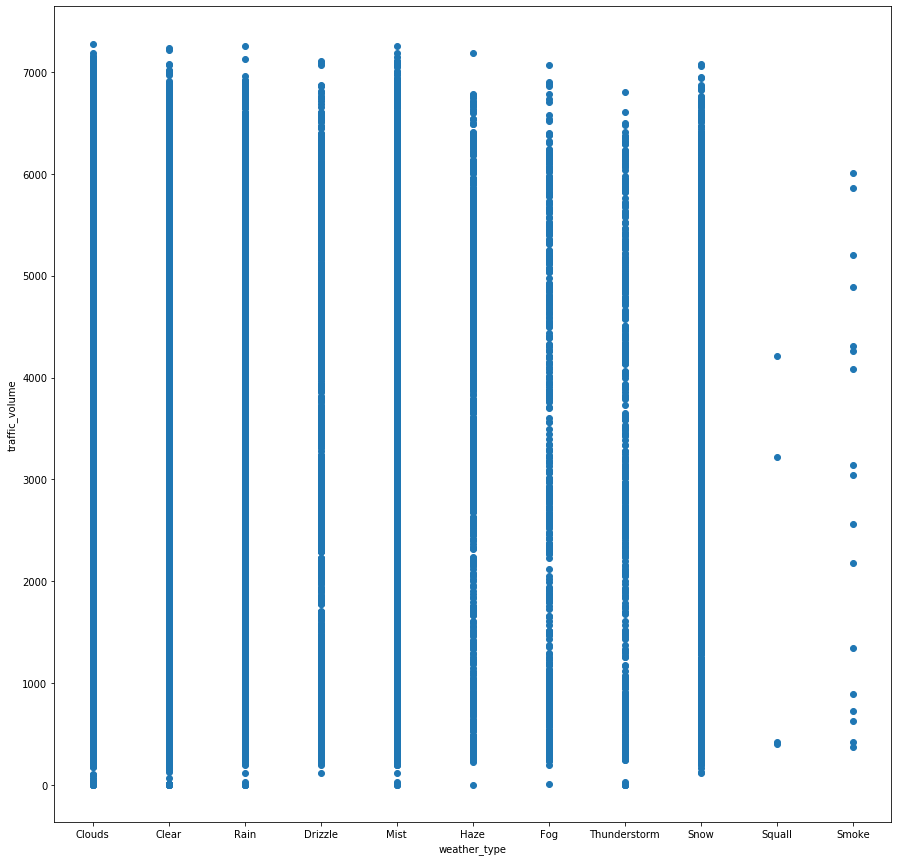

In [31]:
plt.figure(figsize=(15,15))
plt.xlabel('weather_type')
plt.ylabel('traffic_volume')
plt.scatter(train.weather_type,train.traffic_volume)

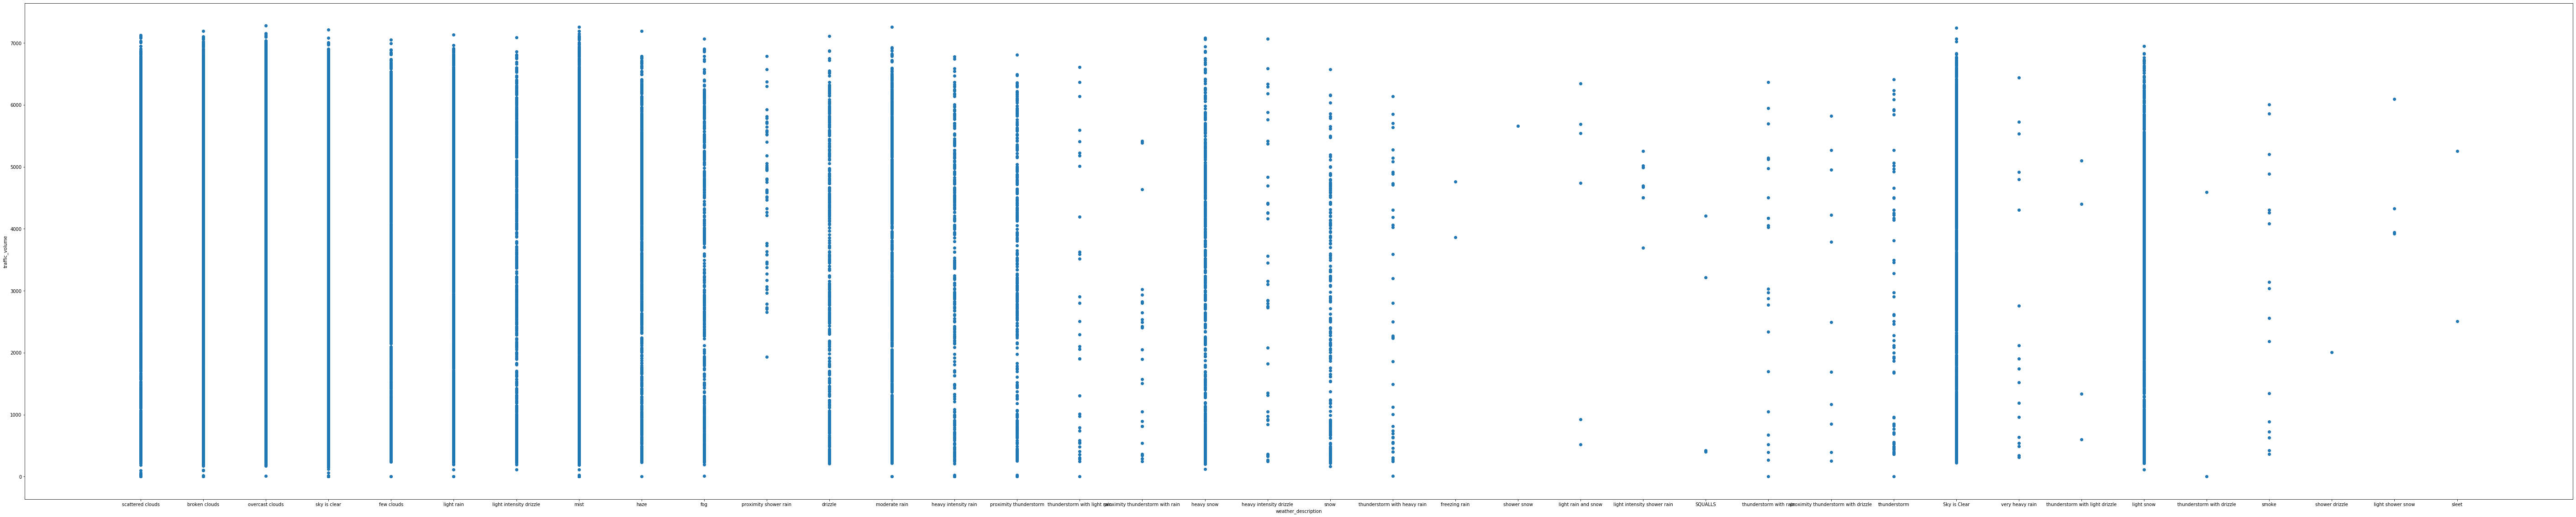

In [32]:
plt.figure(figsize=(100,20))
plt.xlabel('weather_description')
plt.ylabel('traffic_volume')
plt.scatter(train.weather_description,train.traffic_volume)

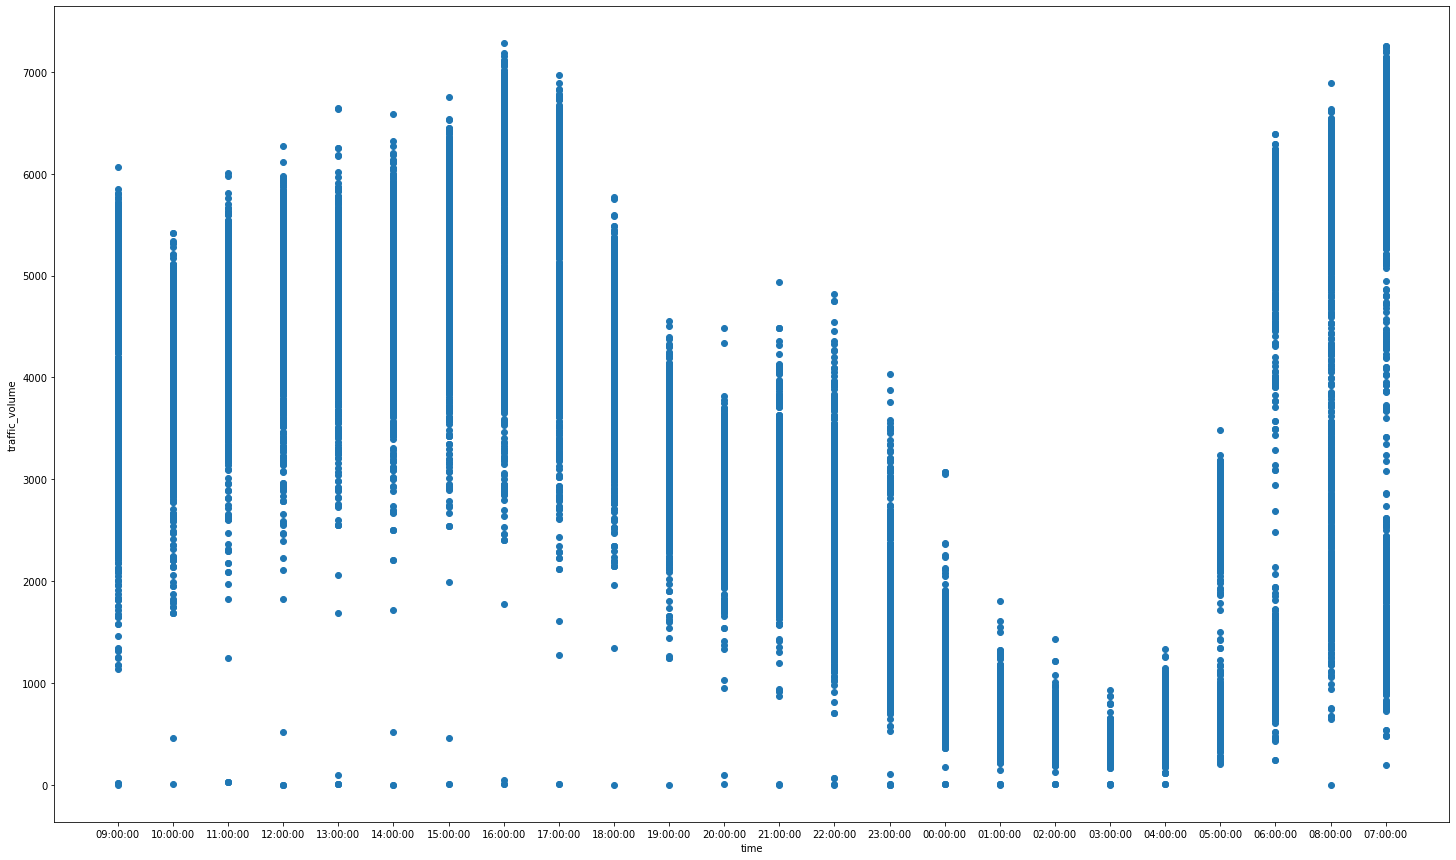

In [33]:
plt.figure(figsize=(25,15))
plt.xlabel('time')
plt.ylabel('traffic_volume')
plt.scatter(train.time,train.traffic_volume)

### Preprocessing Categorical Variables 
(**weather_type, weather_description, date_time, is_holiday**)

### 1. Make combined (train+test)

In [181]:
train['train']=1
test['train']=0

In [182]:
combined = pd.concat([train,test], sort=False)

### 2. Combined Categorical Encoding

Date-Time Split

In [183]:
L1,L2=[],[]
for i in combined.date_time:
    t1,t2=i.split(' ')
    L1.append(t1)
    L2.append(t2)
    
combined.insert(loc=1, column='date', value=L1)
combined.insert(loc=1, column='time', value=L2)

DATE: Day, Month, Year Split

In [184]:
L1,L2,L3=[],[],[]
for i in combined.date:
    t1,t2,t3=i.split('-')
    L1.append(int(t1))
    L2.append(int(t2))
    L3.append(int(t3))

combined.insert(loc=1, column='DD', value=L3)
combined.insert(loc=1, column='MM', value=L2)
combined.insert(loc=1, column='YY', value=L1)

TIME

In [185]:
L=[]
for i in combined.time:
    L.append(int(i.split(':')[0]))    
L=np.array(L)

In [186]:
combined.insert(loc=combined.columns.get_loc("time"), column='time_code', value=L)

Holiday Encoding

In [187]:
labels,uniques=pd.factorize(combined.is_holiday)

In [188]:
combined.insert(loc=combined.columns.get_loc("is_holiday"), column='is_holiday_code', value=labels)

Weather_type Encoding

In [189]:
labels1,uniques1=pd.factorize(combined.weather_type)

In [190]:
combined.insert(loc=combined.columns.get_loc("weather_type"), column='weather_type_code', value=labels1)

 Weather_Description Encoding

In [191]:
labels2,uniques2=pd.factorize(combined.weather_description)

In [192]:
combined.insert(loc=combined.columns.get_loc("weather_description"), column='weather_desc_code', value=labels2)

In [194]:
combined.head()

date_time    YY  MM  DD  time_code      time        date  \
0  2012-10-02 09:00:00  2012  10   2          9  09:00:00  2012-10-02   
1  2012-10-02 10:00:00  2012  10   2         10  10:00:00  2012-10-02   
2  2012-10-02 11:00:00  2012  10   2         11  11:00:00  2012-10-02   
3  2012-10-02 12:00:00  2012  10   2         12  12:00:00  2012-10-02   
4  2012-10-02 13:00:00  2012  10   2         13  13:00:00  2012-10-02   

   is_holiday_code is_holiday  air_pollution_index  ...  temperature  \
0                0       None                  121  ...       288.28   
1                0       None                  178  ...       289.36   
2                0       None                  113  ...       289.58   
3                0       None                   20  ...       290.13   
4                0       None                  281  ...       291.14   

   rain_p_h  snow_p_h  clouds_all  weather_type_code  weather_type  \
0       0.0       0.0          40                  0        Clouds   
1       0.0       0.0          75                  0        Clouds   
2       0.0       0.0          90                  0        Clouds   
3       0.0       0.0          90                  0        Clouds   
4       0.0       0.0          75                  0        Clouds   

   weather_desc_code  weather_description  traffic_volume  train  
0                  0     scattered clouds          5545.0      1  
1                  1        broken clouds          4516.0      1  
2                  2      overcast clouds          4767.0      1  
3                  2      overcast clouds          5026.0      1  
4                  1        broken clouds          4918.0      1  

[5 rows x 25 columns]

In [195]:
combined_drop = combined.drop([ 'date_time', 'date','time', 'is_holiday','weather_type','weather_description','dew_point'], axis = 1) 

In [196]:
combined_drop.head()

YY  MM  DD  time_code  is_holiday_code  air_pollution_index  humidity  \
0  2012  10   2          9                0                  121        89   
1  2012  10   2         10                0                  178        67   
2  2012  10   2         11                0                  113        66   
3  2012  10   2         12                0                   20        66   
4  2012  10   2         13                0                  281        65   

   wind_speed  wind_direction  visibility_in_miles  temperature  rain_p_h  \
0           2             329                    1       288.28       0.0   
1           3             330                    1       289.36       0.0   
2           3             329                    2       289.58       0.0   
3           3             329                    5       290.13       0.0   
4           3             329                    7       291.14       0.0   

   snow_p_h  clouds_all  weather_type_code  weather_desc_code  traffic_volume  \
0       0.0          40                  0                  0          5545.0   
1       0.0          75                  0                  1          4516.0   
2       0.0          90                  0                  2          4767.0   
3       0.0          90                  0                  2          5026.0   
4       0.0          75                  0                  1          4918.0   

   train  
0      1  
1      1  
2      1  
3      1  
4      1

### 3. Separating combined into train, test

In [197]:
train_new = combined_drop[combined_drop['train']==1]
test_new = combined_drop[combined_drop['train']==0]
train_new.drop(['train'], axis=1, inplace=True)
test_new.drop(['train', 'traffic_volume'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [198]:
train_new.head()

YY  MM  DD  time_code  is_holiday_code  air_pollution_index  humidity  \
0  2012  10   2          9                0                  121        89   
1  2012  10   2         10                0                  178        67   
2  2012  10   2         11                0                  113        66   
3  2012  10   2         12                0                   20        66   
4  2012  10   2         13                0                  281        65   

   wind_speed  wind_direction  visibility_in_miles  temperature  rain_p_h  \
0           2             329                    1       288.28       0.0   
1           3             330                    1       289.36       0.0   
2           3             329                    2       289.58       0.0   
3           3             329                    5       290.13       0.0   
4           3             329                    7       291.14       0.0   

   snow_p_h  clouds_all  weather_type_code  weather_desc_code  traffic_volume  
0       0.0          40                  0                  0          5545.0  
1       0.0          75                  0                  1          4516.0  
2       0.0          90                  0                  2          4767.0  
3       0.0          90                  0                  2          5026.0  
4       0.0          75                  0                  1          4918.0

In [199]:
test_new.head()

YY  MM  DD  time_code  is_holiday_code  air_pollution_index  humidity  \
0  2017   5  18          0                0                   73        63   
1  2017   5  18          0                0                  251        63   
2  2017   5  18          0                0                   75        56   
3  2017   5  18          1                0                   98        56   
4  2017   5  18          1                0                  283        56   

   wind_speed  wind_direction  visibility_in_miles  temperature  rain_p_h  \
0           1              27                    4       285.15       0.0   
1           1              27                    4       285.15       0.0   
2           1               0                    1       285.15       0.0   
3           1             351                    2       284.79       0.0   
4           1             351                    1       284.79       0.0   

   snow_p_h  clouds_all  weather_type_code  weather_desc_code  
0       0.0          90                  2                 12  
1       0.0          90                  4                  7  
2       0.0          90                  3                  6  
3       0.0          90                  2                 13  
4       0.0          90                  4                  7

### XGBoost  

In [200]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_squared_log_error

In [201]:
X, y = train_new.iloc[:,:-1],train_new.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=X,label=y)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [202]:
from sklearn.model_selection import train_test_split

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=125)

In [229]:
xg = xgb.XGBRegressor(objective ='reg:linear',colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 15, alpha = 10, n_estimators = 80, reg_lambda=10)
xg.fit(X_train,y_train,  verbose=True)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:51:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='weight', learning_rate=0.01, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=80,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=10, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [230]:
preds = xg.predict(X_test)
rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
print("RMSLE: %f" % (rmsle))

RMSLE: 0.841605


In [231]:
preds = xg.predict(test_new)

In [232]:
preds

array([1278.5347, 1262.1511, 1287.784 , ..., 1593.4749, 1616.4354,
       1452.15  ], dtype=float32)

In [233]:
df = pd.DataFrame({'date_time':test.date_time,'traffic_volume':preds})

In [234]:
df.to_csv('file2.csv', index=False)